# Blotto 13 Soldiers

In [5]:
from games.blotto import Blotto
import numpy as np
import matplotlib.pyplot as plt
from agents.random_agent import RandomAgent
from agents.fictitious_play import FictitiousPlay
from agents.regret_matching import RegretMatching
from utilities.utils import run_and_plot, plot_convergence_to_nash, plot_action_histogram, plot_action_trace_from_history
from utilities.utils import plot_dual_agent_simplex, compute_empirical_distributions

In [6]:
#initialize game
game = Blotto(13,3)
game.reset()

#print game information
agents = game.agents
moves = game._moves
num_action = game._num_actions
action_spaces = game.action_spaces
observation_spaces = game.observation_spaces 
print("Game Information:")
print("Agents:", agents)
print("Moves:", moves)
print("Number of Actions:", num_action)
print("Action Spaces:", action_spaces)
print("Observation Spaces:", observation_spaces)

Game Information:
Agents: ['agent_0', 'agent_1']
Moves: [[1, 1, 11], [1, 2, 10], [1, 3, 9], [1, 4, 8], [1, 5, 7], [1, 6, 6], [2, 2, 9], [2, 3, 8], [2, 4, 7], [2, 5, 6], [3, 3, 7], [3, 4, 6], [3, 5, 5], [4, 4, 5]]
Number of Actions: 14
Action Spaces: {'agent_0': Discrete(14), 'agent_1': Discrete(14)}
Observation Spaces: {'agent_0': typing.Dict[~AgentID, ~ActionType], 'agent_1': typing.Dict[~AgentID, ~ActionType]}


# Fictitious Play vs Fictitious Play

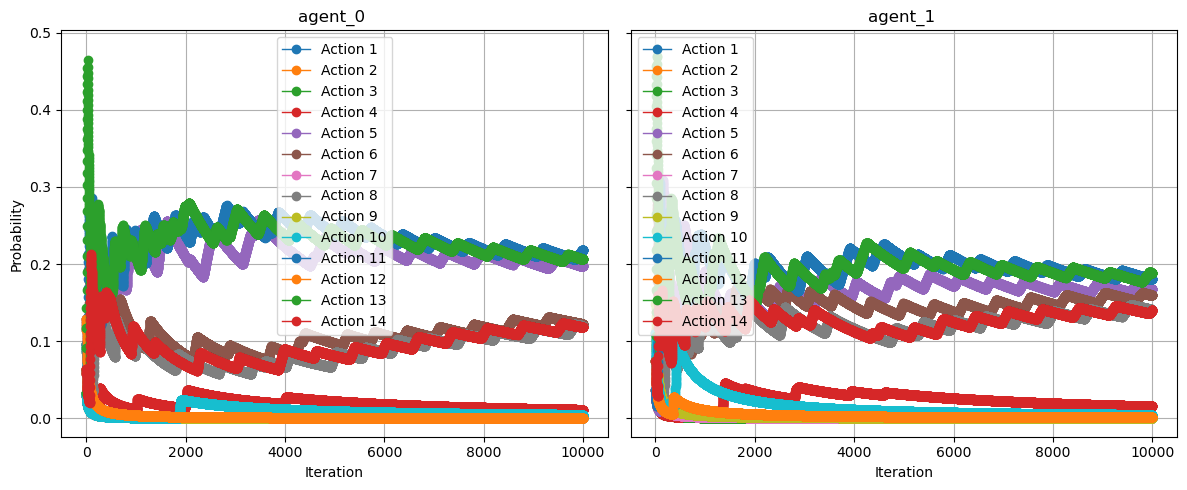

In [13]:
fp_agents = {agent: FictitiousPlay(game, agent) for agent in agents}
policies, action_history = run_and_plot(fp_agents, game, num_iterations=10000, title_suffix="")

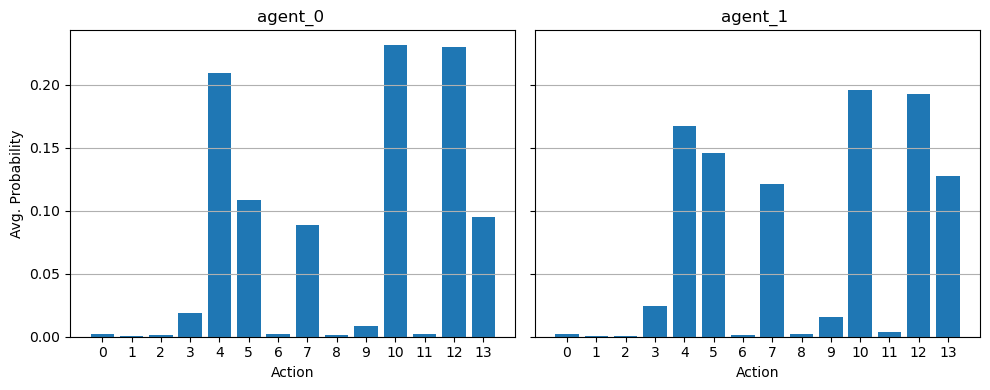

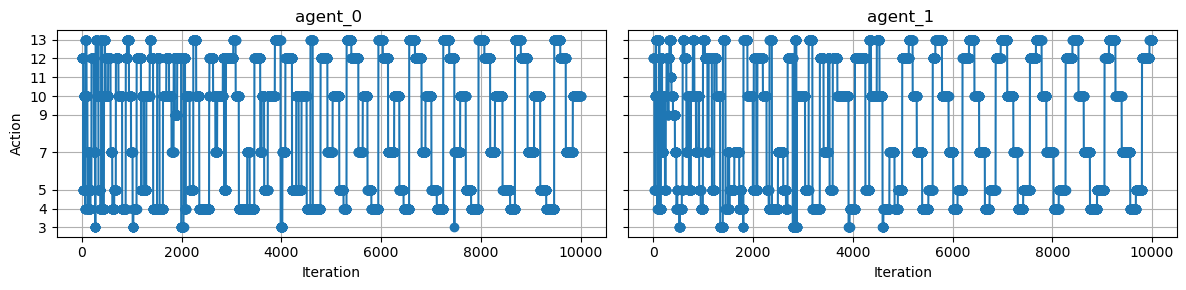

In [14]:

plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [15]:
for agent in fp_agents:
    print(agent, fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in fp_agents:
    action = get_action_from_policy(fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [3.98803589e-04 9.97008973e-05 2.99102692e-04 1.12662014e-02
 1.97008973e-01 1.22233300e-01 3.98803589e-04 1.19840479e-01
 1.99401795e-04 4.68594217e-03 2.18743769e-01 3.98803589e-04
 2.06181456e-01 1.18245264e-01]
agent_1 [2.99222023e-04 9.97406742e-05 9.97406742e-05 1.56592859e-02
 1.67763814e-01 1.59585079e-01 1.99481348e-04 1.40933573e-01
 3.98962697e-04 4.58807102e-03 1.80131658e-01 1.09714742e-03
 1.88509874e-01 1.40634351e-01]
Action with high probability for agent_0: [3, 3, 7]
Action with high probability for agent_1: [3, 5, 5]


# Regret Matching vs Regret Matching

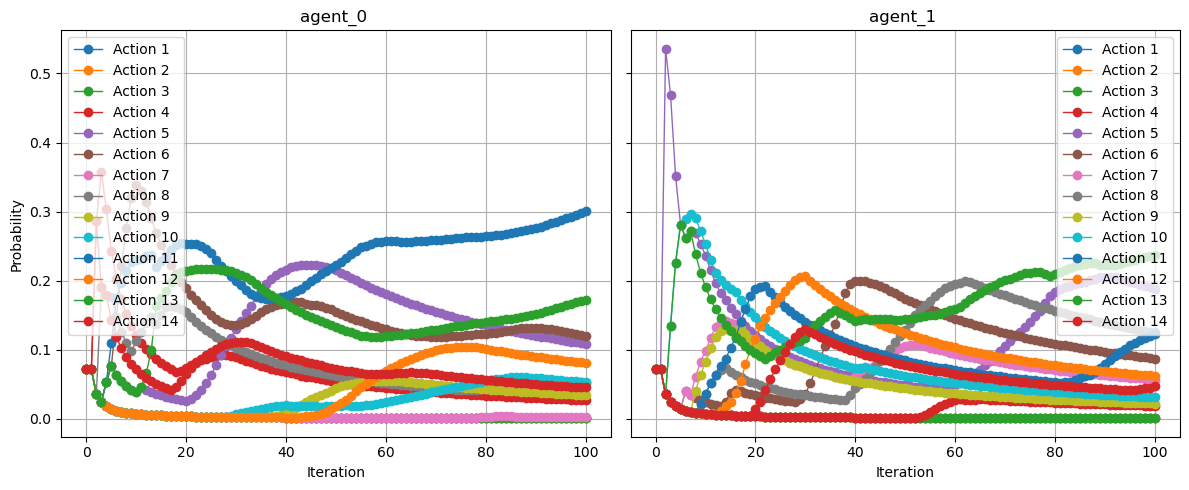

In [10]:
rm_agents = {agent: RegretMatching(game, agent) for agent in agents}
policies, action_history = run_and_plot(rm_agents, game, num_iterations=100, title_suffix="")

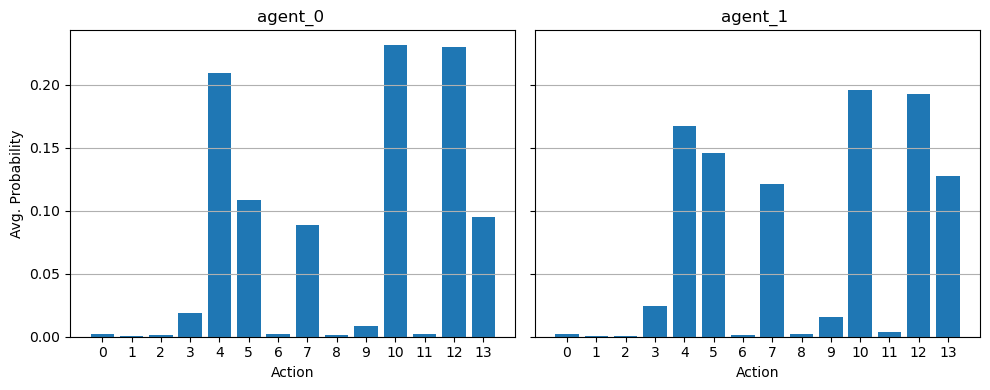

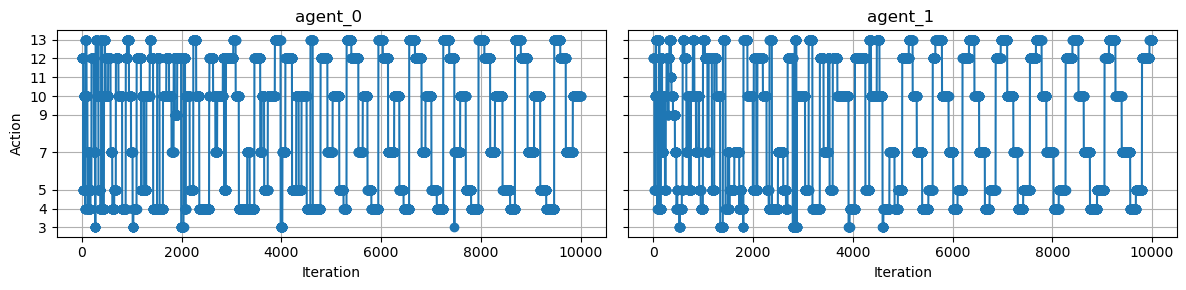

In [16]:

plot_action_histogram(policies)
plot_action_trace_from_history(action_history)


In [17]:
for agent in rm_agents:
    print(agent, rm_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_agents:
    action = get_action_from_policy(rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.00071429 0.00071429 0.00071429 0.02690949 0.10832508 0.12020355
 0.00278658 0.05245793 0.03426822 0.053134   0.30021357 0.08086443
 0.17263787 0.04605642]
agent_1 [0.00071429 0.00071429 0.00071429 0.01865401 0.18821341 0.08705635
 0.05653527 0.12507286 0.02198981 0.03117504 0.12226252 0.06203615
 0.23759982 0.0472619 ]
Action with high probability for agent_0: [3, 3, 7]
Action with high probability for agent_1: [3, 5, 5]


# Fictitious Play vs Regret Matching

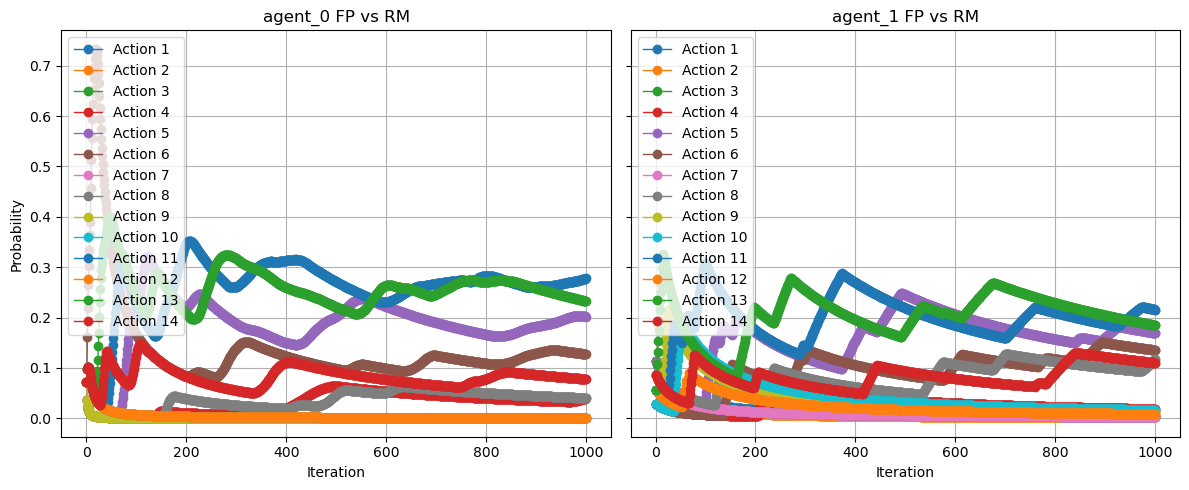

In [20]:
rm_vs_fp_agents = {agents[0]: RegretMatching(game=game, agent=agents[0]),
              agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(rm_vs_fp_agents, game, num_iterations=1000, title_suffix="FP vs RM")

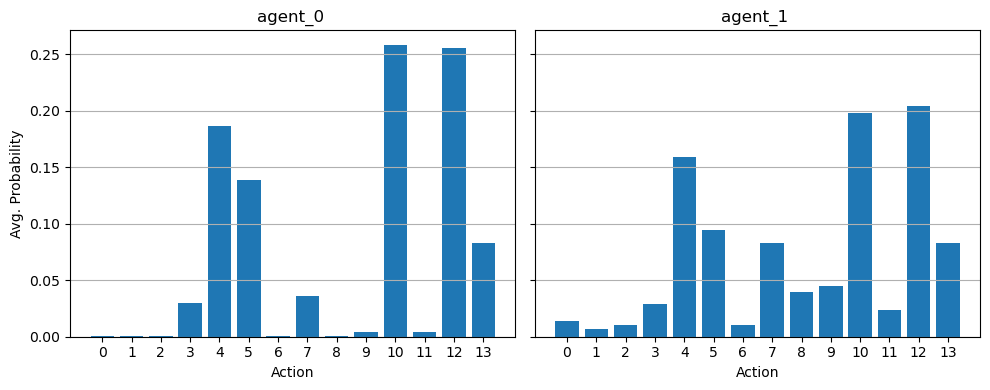

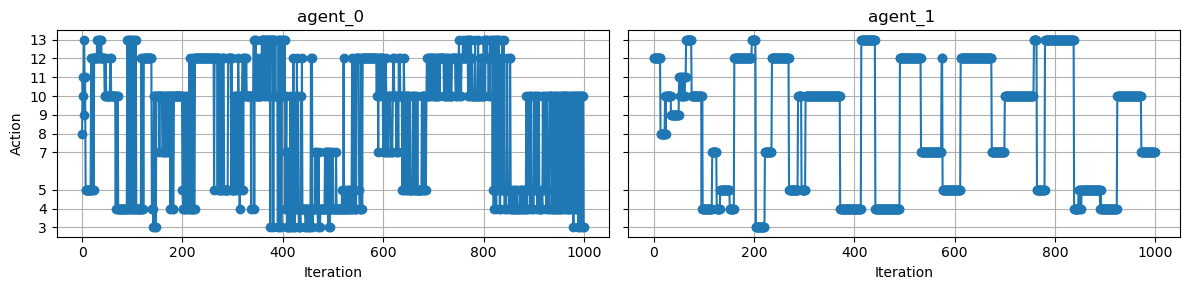

In [21]:
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [22]:
for agent in rm_vs_fp_agents:
    print(agent, rm_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in rm_vs_fp_agents:
    action = get_action_from_policy(rm_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [7.14285714e-05 7.14285714e-05 7.14285714e-05 3.94357953e-02
 2.01932312e-01 1.27487416e-01 7.14285714e-05 4.02922911e-02
 7.14285714e-05 7.30133755e-04 2.77716058e-01 7.30133755e-04
 2.32653175e-01 7.86655420e-02]
agent_1 [0.00386847 0.00193424 0.00290135 0.01837524 0.16924565 0.13539652
 0.00290135 0.11702128 0.01257253 0.01644101 0.21566731 0.00870406
 0.18471954 0.11025145]
Action with high probability for agent_0: [3, 3, 7]
Action with high probability for agent_1: [3, 3, 7]


# Random Agent vs Random Agent

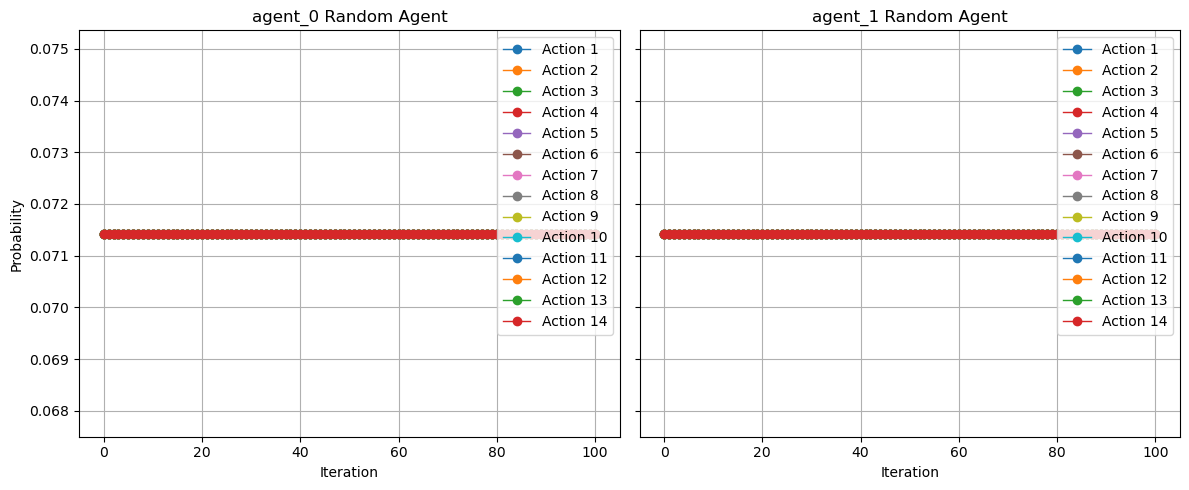

In [23]:
random_agents = {agent: RandomAgent(game, agent) for agent in agents}
policies, action_history = run_and_plot(random_agents, game, num_iterations=100, title_suffix="Random Agent")

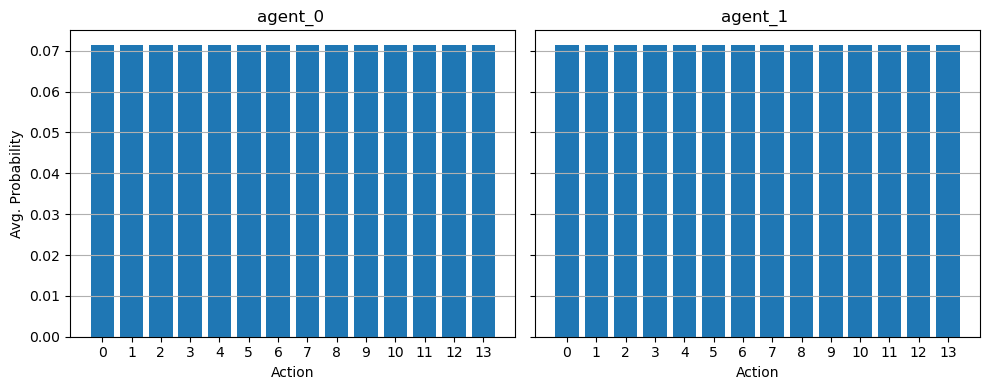

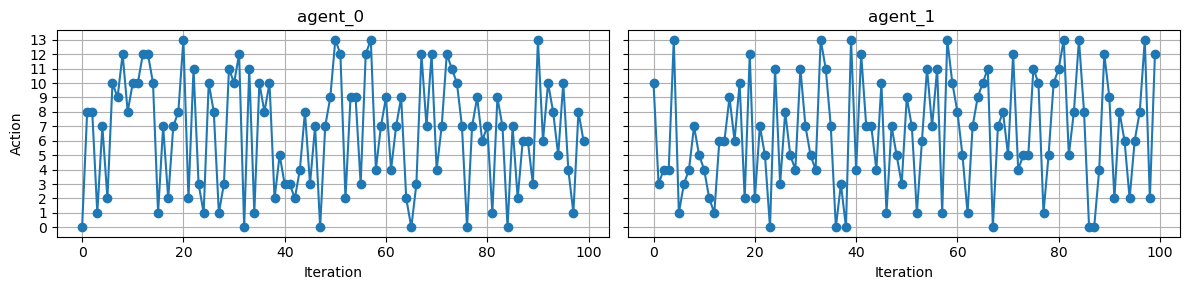

In [24]:
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

# Random Agent vs Fictitious Play

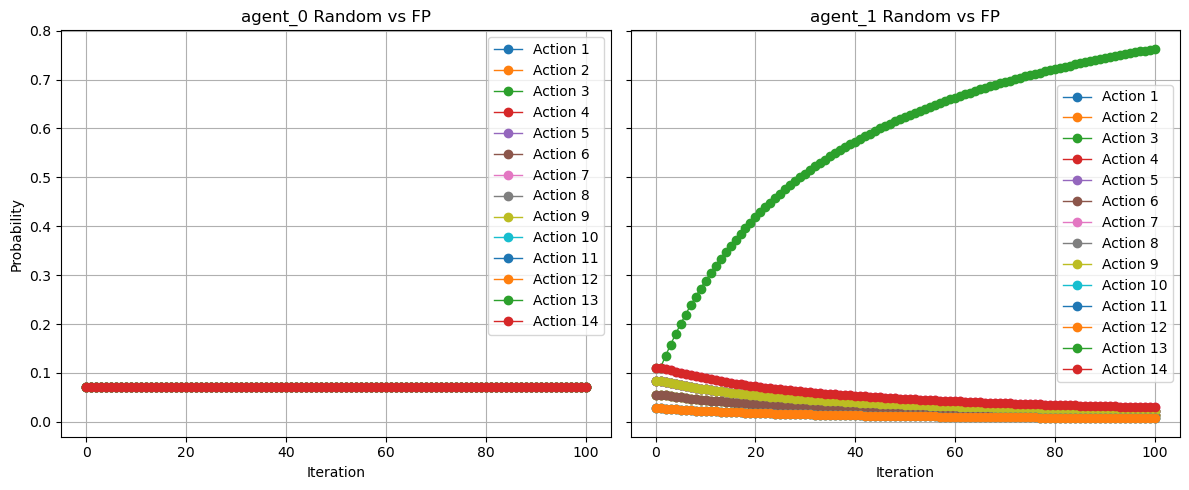

In [25]:
random_vs_fp_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                          agents[1]: FictitiousPlay(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_fp_agents, game, num_iterations=100, title_suffix="Random vs FP")

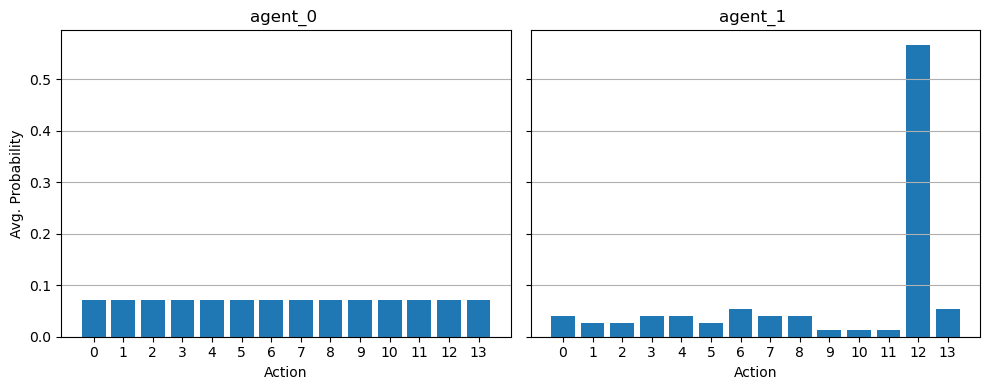

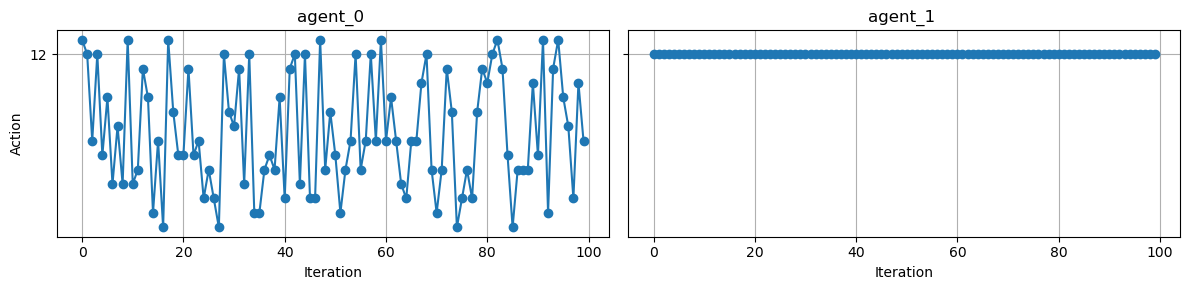

In [26]:
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [27]:
for agent in random_vs_fp_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_fp_agents:
    action = get_action_from_policy(random_vs_fp_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]
agent_1 [0.02222222 0.01481481 0.01481481 0.02222222 0.02222222 0.01481481
 0.02962963 0.02222222 0.02222222 0.00740741 0.00740741 0.00740741
 0.76296296 0.02962963]
Action with high probability for agent_0: [1, 1, 11]
Action with high probability for agent_1: [3, 5, 5]


# Random Agent vs Regret Matching


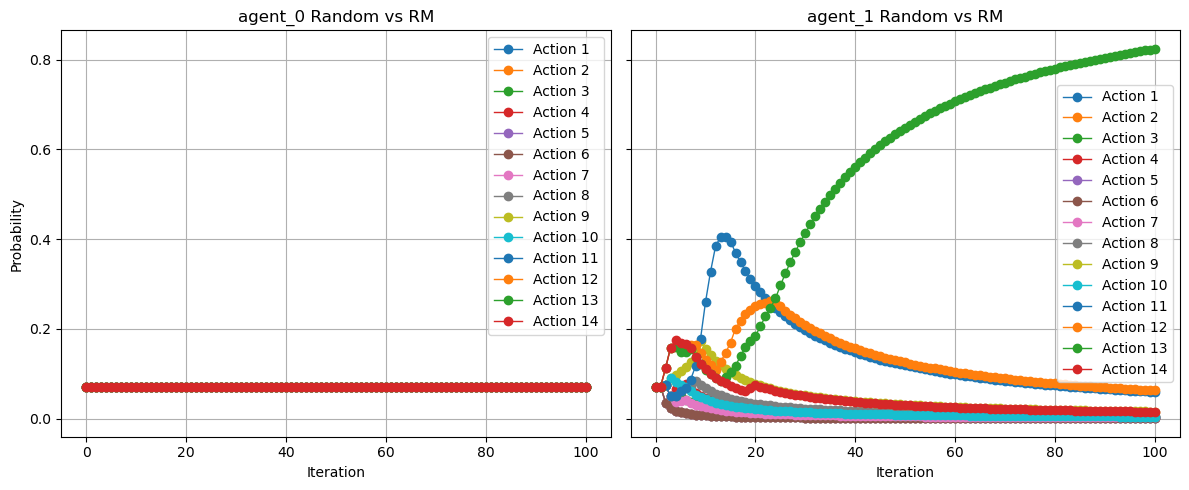

In [28]:
random_vs_rm_agents = {agents[0]: RandomAgent(game=game, agent=agents[0]),
                            agents[1]: RegretMatching(game=game, agent=agents[1])}
policies, action_history = run_and_plot(random_vs_rm_agents, game, num_iterations=100, title_suffix="Random vs RM")

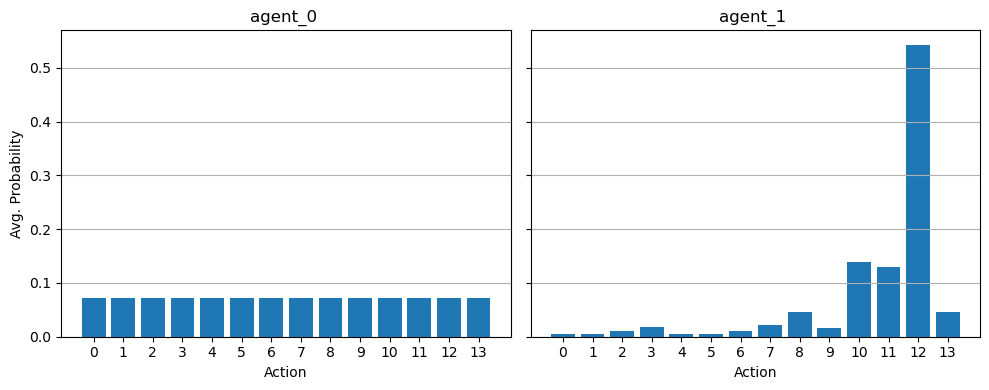

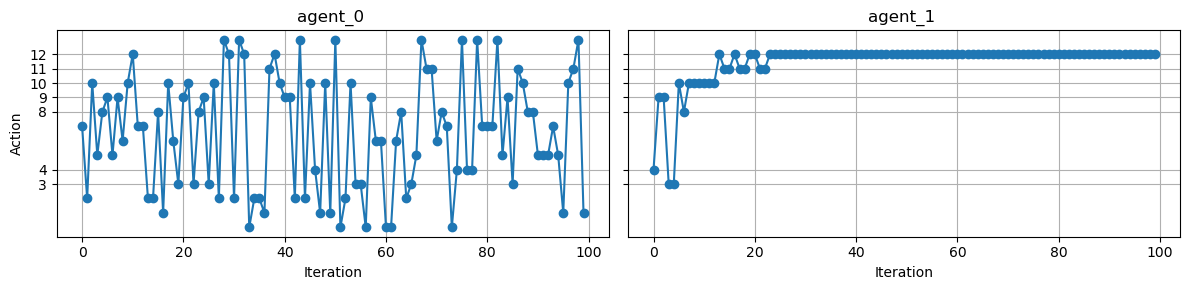

In [29]:
plot_action_histogram(policies)
plot_action_trace_from_history(action_history)

In [30]:
for agent in random_vs_rm_agents:
    print(agent, random_vs_fp_agents[agent].policy())

# get from the game._moves the move corresponding to the action with high probability
def get_action_from_policy(policy):
    action = np.argmax(policy)
    return game._moves[action]

# get the action with high probability for each agent
for agent in random_vs_rm_agents:
    action = get_action_from_policy(random_vs_rm_agents[agent].policy())
    print(f"Action with high probability for {agent}: {action}")

agent_0 [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857]
agent_1 [0.02222222 0.01481481 0.01481481 0.02222222 0.02222222 0.01481481
 0.02962963 0.02222222 0.02222222 0.00740741 0.00740741 0.00740741
 0.76296296 0.02962963]
Action with high probability for agent_0: [1, 1, 11]
Action with high probability for agent_1: [3, 5, 5]
